In [79]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 1. Read and split dataset


## Read

In [80]:
df = pd.read_csv('../clean_data/clean_apple.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Close+1'] = df['Close'].shift(-1)
df[['Close', 'Close+1']].tail(2)
df = df.drop(columns=[ 'tema_8', 'tema_100'])
df.dropna()


,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,tema_2,Close+1
Date,,,,,,,,,,,,,,,,,,,,,
1981-05-06 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,18950400,1.732413,13.797179,34.412223,-100.000000,-3.524019,...,0.094021,0.096697,0.099374,5.536127,0.149543,0.094821,0.098285,0.095038,0.094897,0.096120
1981-05-07 00:00:00-04:00,0.096120,0.096553,0.096120,0.096120,9363200,1.755353,41.587538,28.006879,0.000723,-1.769775,...,0.093999,0.096120,0.098241,4.413220,0.500002,0.094821,0.097852,0.096337,0.095970,0.096986
1981-05-08 00:00:00-04:00,0.096986,0.097419,0.096986,0.096986,7907200,1.539442,55.827769,22.867958,87.499635,-0.444408,...,0.094197,0.095976,0.097755,3.707703,0.783887,0.094821,0.097419,0.097203,0.096971,0.094821
1981-05-11 00:00:00-04:00,0.095254,0.095254,0.094821,0.094821,11939200,1.928778,29.164919,28.873056,-100.000000,0.000000,...,0.094197,0.095976,0.097755,3.707703,0.175557,0.094821,0.097419,0.095038,0.094956,0.094821
1981-05-12 00:00:00-04:00,0.094821,0.096120,0.094821,0.094821,4256000,1.649274,29.164919,22.462062,-39.285796,-1.351279,...,0.093502,0.095543,0.097584,4.272298,0.323223,0.094821,0.097419,0.095471,0.094763,0.094388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,189.080002,190.070007,188.940002,189.589996,46347300,0.990360,82.130415,70.421457,74.977544,2.331728,...,187.654737,188.966665,190.278593,1.388529,0.737563,185.669998,190.070007,189.505005,189.651317,193.970001
2023-06-30 00:00:00-04:00,191.630005,194.479996,191.259995,193.970001,85069600,1.744503,93.782080,78.988970,100.000000,3.142616,...,186.637909,190.936666,195.235423,4.502809,0.852815,187.600006,194.479996,192.869995,193.833325,192.460007
2023-07-03 00:00:00-04:00,193.779999,193.880005,191.759995,192.460007,31458200,1.453242,70.134070,84.700645,38.282485,1.696173,...,188.373397,192.006668,195.639939,3.784526,0.562387,188.940002,194.479996,192.820000,192.671886,191.330002


## SPLIT DATASET 

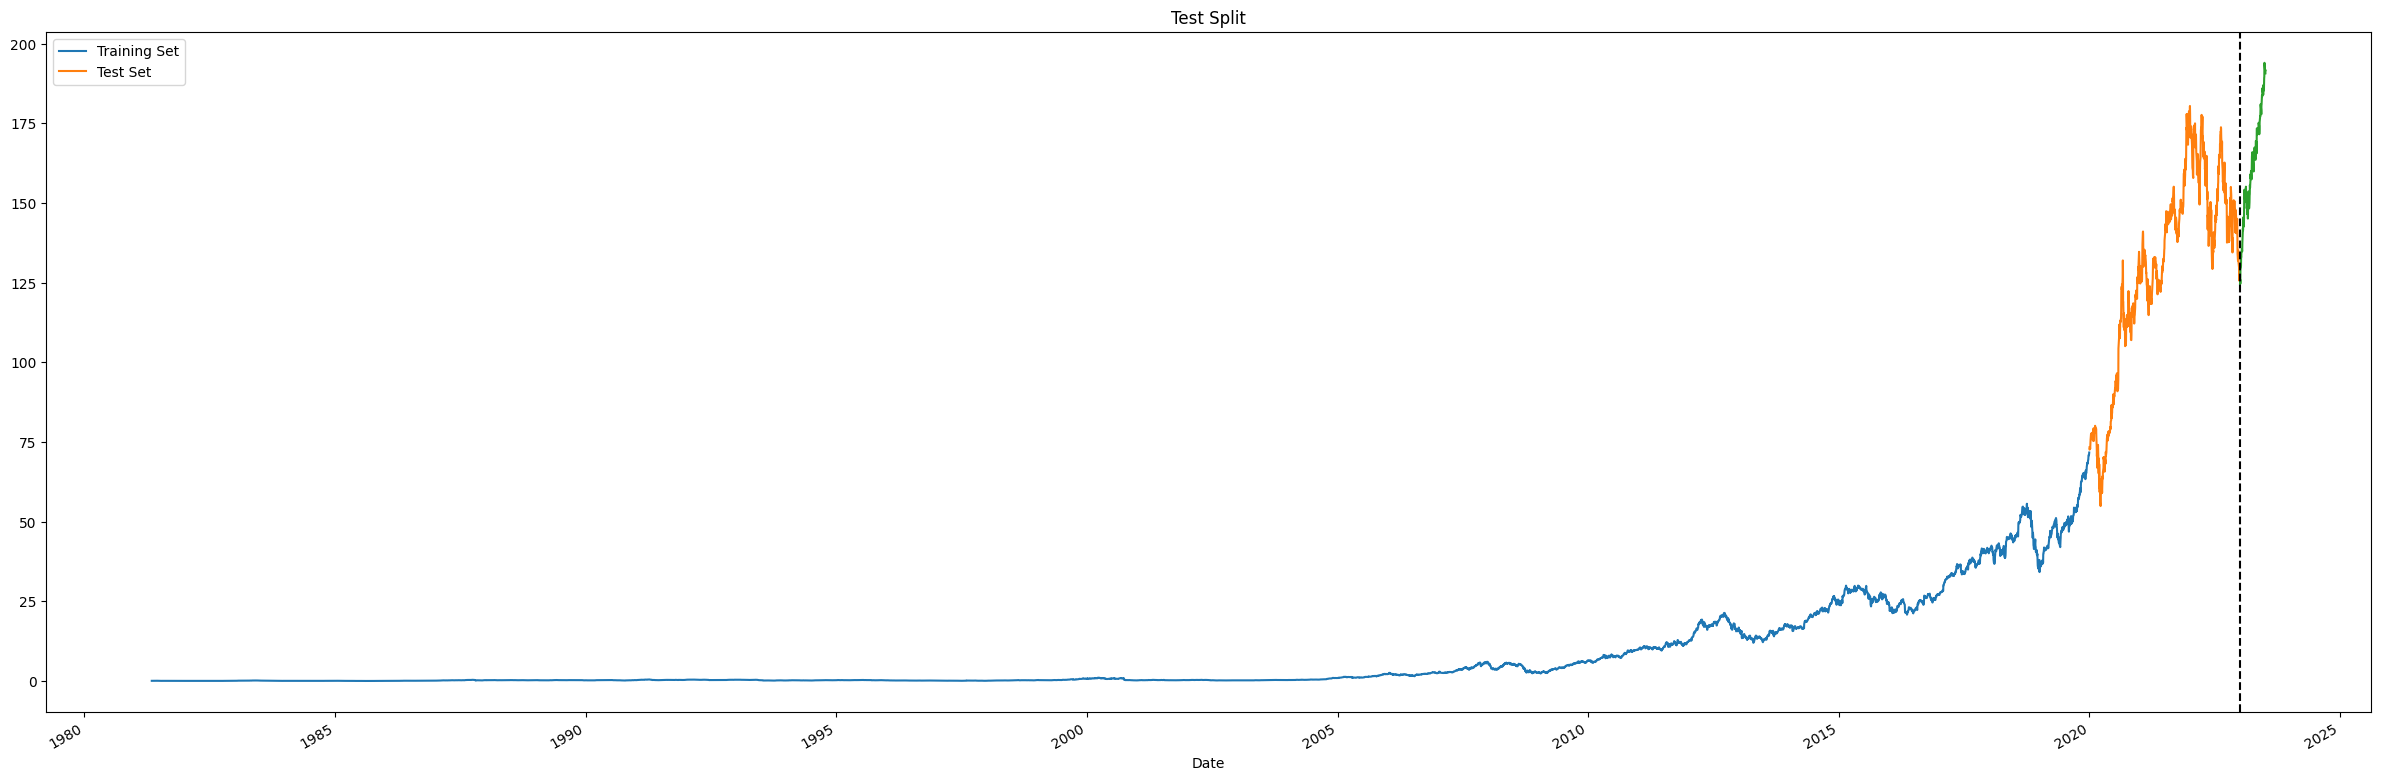

In [81]:
train = df.loc[(df.index < pd.to_datetime('2020-01-01 00:00:00-04:00'))]
test = df.loc[(df.index >= pd.to_datetime('2020-01-01 00:00:00-04:00')) & (df.index < pd.to_datetime('2023-01-01 00:00:00-04:00'))]
test_last = df.loc[df.index >=  pd.to_datetime('2023-01-01 00:00:00-04:00')]

fig, ax = plt.subplots(figsize=(30, 10))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

test_last['Close'].plot(ax=ax, label='val Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
# plt.show()

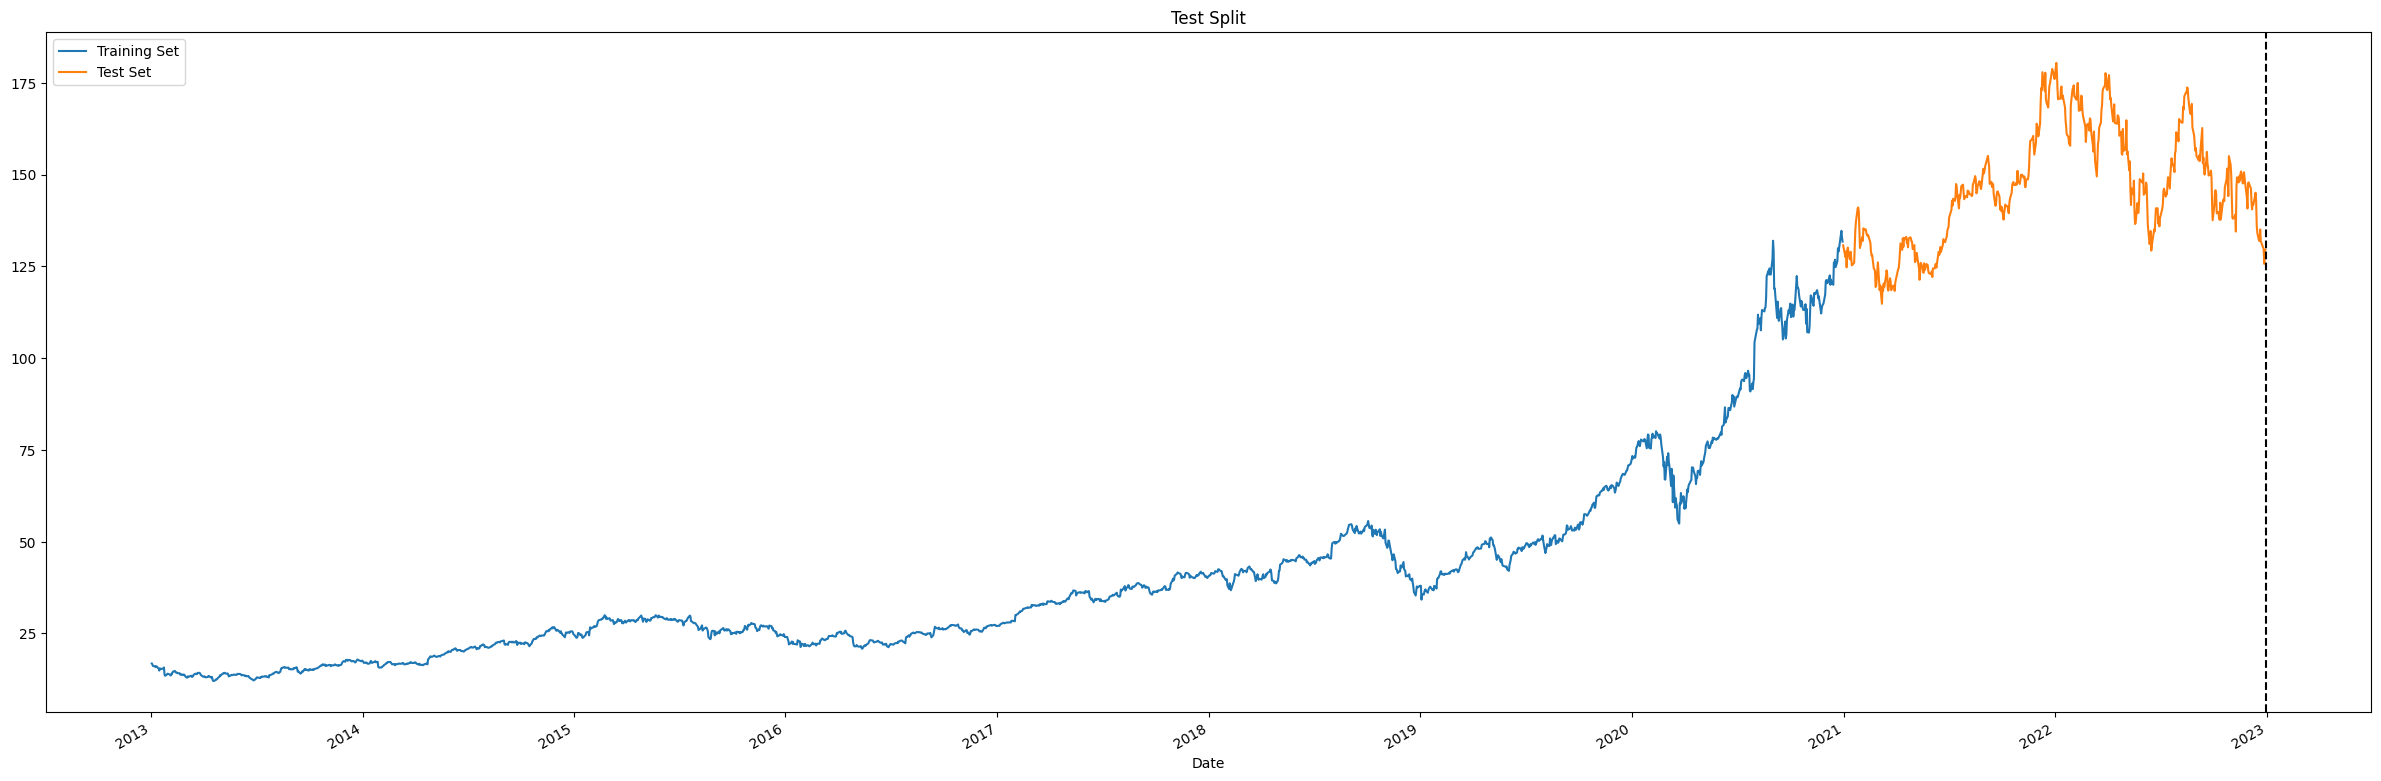

In [82]:
temp_df = df.loc[ pd.to_datetime('2013-01-01 00:00:00-04:00'): pd.to_datetime('2022-12-31 00:00:00-04:00')]
# pd.to_datetime('2023-01-01 00:00:00-04:00')
train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)

train = temp_df[:train_size]
test= temp_df[train_size:]

fig, ax = plt.subplots(figsize=(30, 10))

train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## cross val

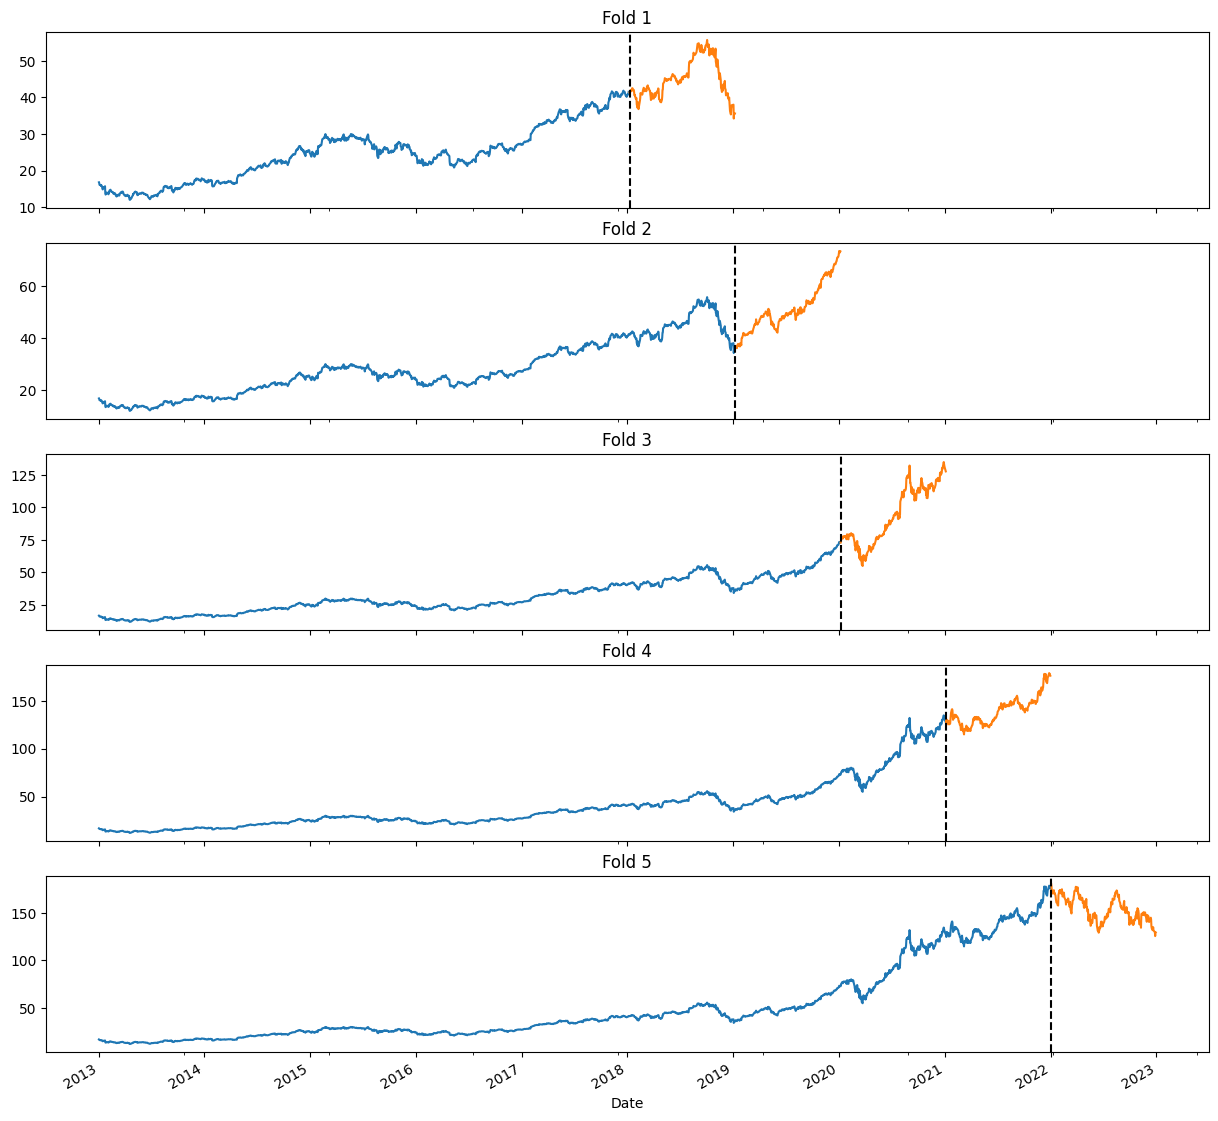

In [83]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)


fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
fold = 0

for train_idx, val_idx in tscv.split(temp_df.copy()):
    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]

    train["Close"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    test["Close"].plot(ax=axs[fold], label='Val Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

# Model

## LSTM


In [2]:
import torch
import torch.nn as nn


In [13]:
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out = self.lstm(x, (h0,c0))
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out
    


In [9]:
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out

# Define the input parameters
input_size = 10  # Size of input features
hidden_size = 32  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Size of the output

# Create an instance of the LSTM network
net = LSTMNet(input_size, hidden_size, num_layers, output_size)

# Print the network architecture
print(net)

LSTMNet(
  (lstm): LSTM(10, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [14]:
model = LSTMNet(input_size=1, hidden_size=2, num_layers=1, output_size=1)

model

LSTMNet(
  (lstm): LSTM(1, 2, batch_first=True)
  (fc): Linear(in_features=2, out_features=1, bias=True)
)